In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
soup = BeautifulSoup(urllib.request.urlopen("https://covid19asi.saglik.gov.tr/"),"html.parser",).find(id="turkiye")
soup = soup.find_all("g")

tags = []
province = []
first_dose = []
second_dose = []

for tag in soup:
    tags.append(tag)

for data in tags:
    province.append(data.get("data-adi"))
    first_dose.append(int(data.get("data-birinci-doz").replace('.','')))
    second_dose.append(int(data.get("data-ikinci-doz").replace('.','')))

vac_data = {'province': province, 'First Dose': first_dose, 'Second Dose': second_dose}

df_vac = pd.DataFrame.from_dict(vac_data)

In [3]:
df_population = pd.read_csv('population_2020.csv')
df_population["population"]=pd.to_numeric(df_population["population"])

In [4]:
df_vac_pop = pd.merge(df_population, df_vac)
df_vac_pop = df_vac_pop.set_index(df_vac_pop['province'])
df_vac_pop = df_vac_pop.drop(columns='province')

In [5]:
df_vac_pop['Total Doses'] = df_vac_pop['First Dose'] + df_vac_pop['Second Dose']
df_vac_pop['First Dose Percent'] = ((df_vac_pop['First Dose']/df_vac_pop['population'])*100).round(2)
df_vac_pop['Second Dose Percent'] = ((df_vac_pop['Second Dose']/df_vac_pop['population'])*100).round(2)
df_vac_pop['Dose Per 100 people'] = ((df_vac_pop['Total Doses']/df_vac_pop['population'])*100).round(2)

In [6]:
x = (df_vac_pop['First Dose Percent']).sort_values()
ax = x.plot(kind='barh')
ax.set_xlabel("%")
ax.axes.set_xticks(range(0,105,5))
ax.figure.set_size_inches(16,16)
ax.axes.grid(True,axis='x')
for i, v in enumerate(x):
    ax.text(v,i,str(v)+"%")
fig = ax.axes.set_title("Percentage First Dose")


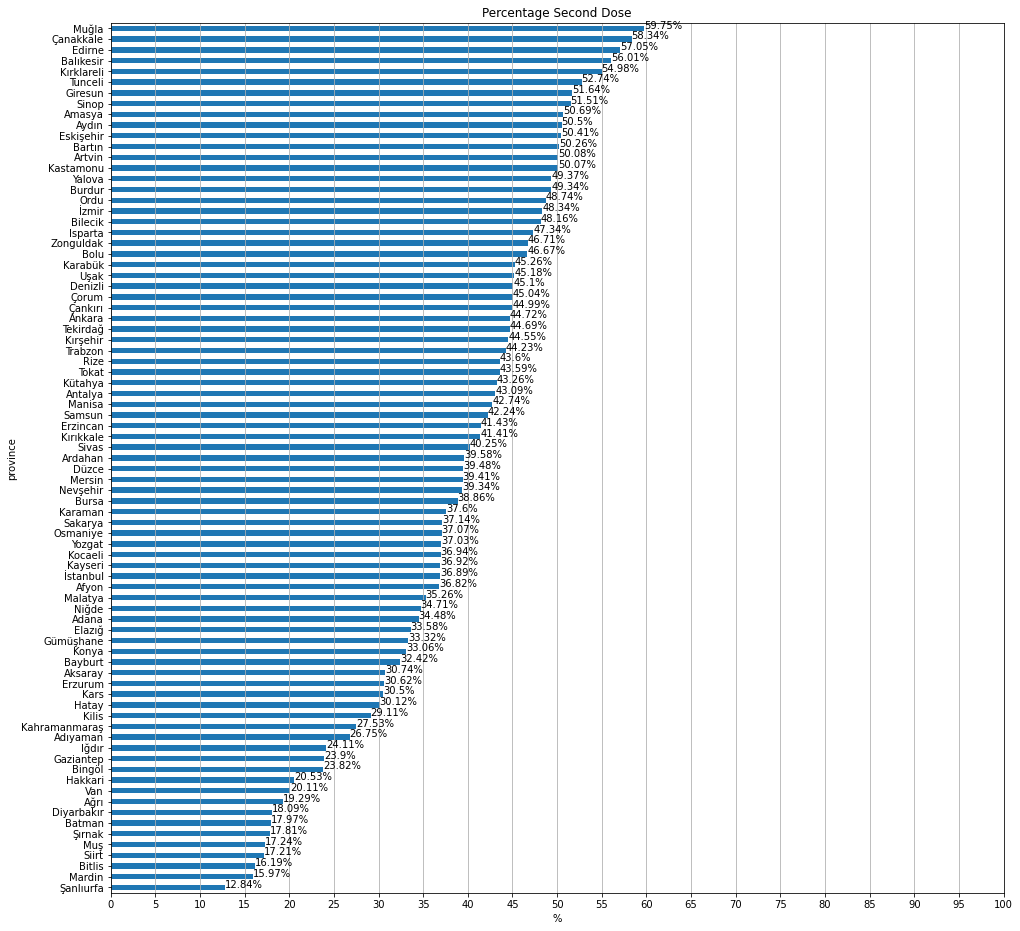

In [ ]:
x1 = (df_vac_pop['Second Dose Percent']).sort_values()
ax1 = x1.plot(kind='barh')
ax1.set_xlabel("%")
ax1.axes.set_xticks(range(0,105,5))
ax1.figure.set_size_inches(16,16)
for i, v in enumerate(x1):
    ax1.text(v,i,str(v)+"%")
ax1.axes.grid(True,axis='x')
fig1 = ax1.axes.set_title("Percentage Second Dose")

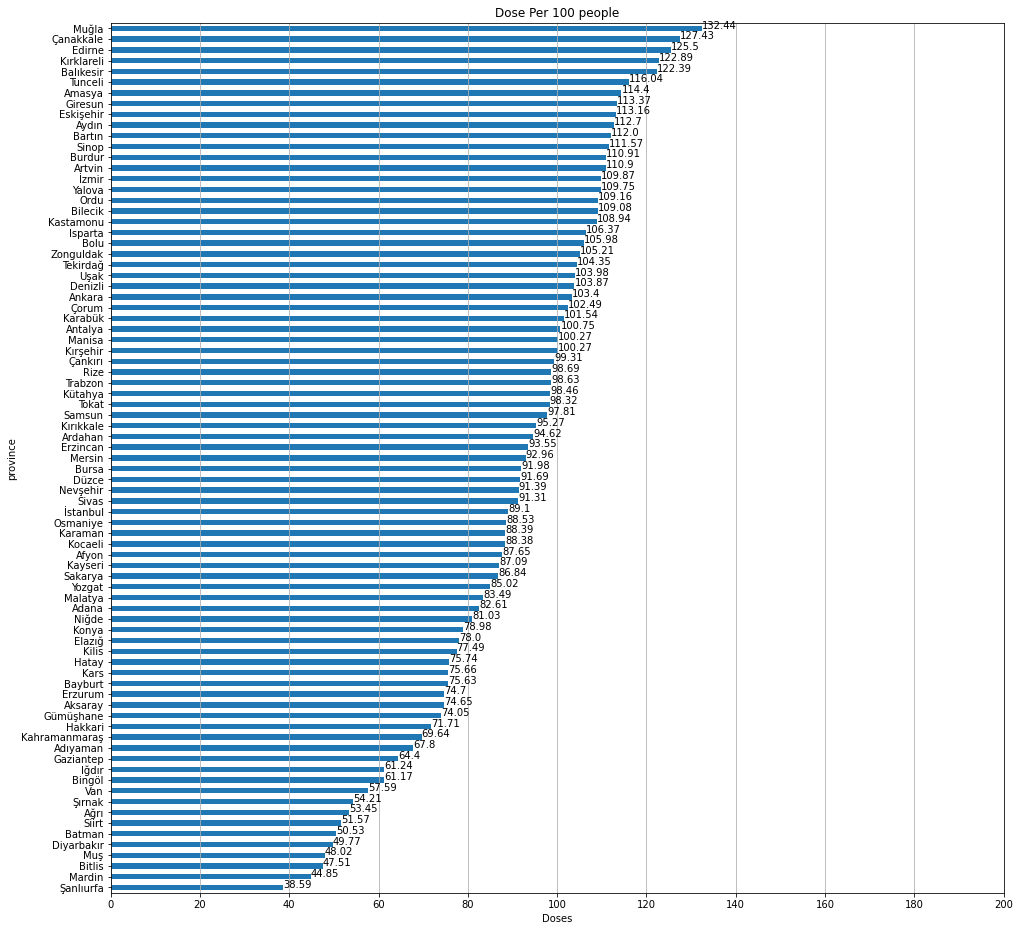

In [ ]:
x2 = (df_vac_pop['Dose Per 100 people']).sort_values()
ax2 = x2.plot(kind='barh')
ax2.set_xlabel("Doses")
ax2.axes.set_xticks(range(0,205,20))
ax2.figure.set_size_inches(16,16)
for i, v in enumerate(x2):
    ax2.text(v,i,str(v))
ax2.axes.grid(True,axis='x')
fig2 = ax2.axes.set_title("Dose Per 100 people")